In [105]:
import os
import numpy
import re
import random
from scipy.stats import gaussian_kde, pearsonr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.transforms as mtransforms
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X_v = [0.03061972, 0.0484425, 0.03070419, 0.0484425, 0.04502154, 0.04398853, 0.03805293, 0.07162811, 0.05431281, 0.04818589, 0.02793552, 0.04818589, 0.05568766, 0.0520976, 0.0365484, 0.03638231, 0.04585709, 0.04757298, 0.04843093, 0.03729636, 0.03000956, 0.03445063, 0.04997364, 0.04997364, 0.04865854, 0.05076641, 0.03852814, 0.04538531, 0.04538531, 0.05025782, 0.04035338, 0.03907772, 0.03567596, 0.05061124, 0.04243696, 0.06036043, 0.05139601, 0.05139601, 0.04913356, 0.05579284, 0.05374383, 0.04943172, 0.04643075, 0.04643075, 0.0525267, 0.05548052, 0.04519393, 0.06120279, 0.06120279, 0.06120279, 0.06120279, 0.04583772, 0.06060192, 0.03549527, 0.03257959, 0.03680521, 0.03431209, 0.03912439, 0.04624955, 0.04659087, 0.04646288, 0.03106111, 0.03370738, 0.04041775, 0.03370738, 0.04079746, 0.05371486, 0.05653603, 0.05312919, 0.05197534, 0.0463645, 0.04580296, 0.04593043, 0.07960664, 0.03404334, 0.03559421, 0.03869175, 0.03559421, 0.03559421, 0.03198924, 0.03721197, 0.03377358, 0.04592592, 0.04592592, 0.03377358, 0.04376175, 0.04348591, 0.04662844, 0.0434887, 0.04621034, 0.04422325, 0.045703, 0.04422325, 0.04621034, 0.0435468, 0.03965507, 0.04568162, 0.04568162, 0.02638619, 0.04021359, 0.04347159, 0.03527333, 0.03527333, 0.03667071, 0.03667071, 0.03620492, 0.03667071, 0.04459782, 0.05106621, 0.0596198, 0.05106621, 0.05289608, 0.05715159, 0.05137485, 0.03371748, 0.03459731, 0.03459731, 0.03459731, 0.0522362, 0.05556865, 0.2860974, 0.34901666, 0.05855512, 0.06127713, 0.05427771, 0.04414358, 0.04414358, 0.05792772, 0.05792772, 0.04414358, 0.06127713, 0.05792772, 0.0423516, 0.0465265, 0.04592394, 0.05300285, 0.04514425, 0.05475394, 0.05533617, 0.05533617, 0.04978575, 0.04978575, 0.053278, 0.04169397, 0.05992177, 0.05346117, 0.053278, 0.04170493, 0.05495266, 0.05349753, 0.05349753, 0.06201434, 0.03745563, 0.0358419, 0.06158646, 0.04675209, 0.06245784, 0.05554759, 0.05456084, 0.05456084, 0.04580683, 0.04580978, 0.0468568, 0.04753343, 0.04406569, 0.04753343, 0.03601468, 0.06217934, 0.03649572, 0.03649572, 0.04297753, 0.04023842, 0.03227537, 0.04049229, 0.04798146, 0.05086468, 0.03520914, 0.04251177, 0.03546995, 0.04379365, 0.0563367, 0.05291198, 0.04379365, 0.04832184, 0.04281331, 0.06181279, 0.06181279, 0.04814973, 0.03484363, 0.02881493, 0.04870487, 0.03101271, 0.03058903, 0.05894802, 0.04883352, 0.04455148, 0.04484905, 0.05250102, 0.03447638, 0.04442394]
Y_v = [0.01345497, 0.01668952, 0.01289811, 0.01668952, 0.02159372, 0.02694004, 0.02157492, 0.03395318, 0.04231471, 0.00525623, -0.00475035, 0.01408964, 0.03173934, 0.02760259, 0.02177711, 0.01414066, 0.02557008, 0.02818498, 0.03346936, 0.02516908, 0.01777287, 0.02517425, 0.03524719, 0.03524719, 0.02692464, 0.03123343, 0.01034085, 0.02912624, 0.02912624, 0.03322855, 0.01926665, 0.02154724, 0.01656089, 0.03875148, 0.02253317, 0.03987407, 0.03417867, 0.03288535, 0.03113445, 0.03397405, 0.03424026, 0.03129565, 0.02300812, 0.03124919, 0.0329214, 0.03519282, 0.03733459, 0.03619658, 0.03619658, 0.03619658, 0.03619658, 0.02592375, 0.03518086, 0.01901277, 0.01789836, 0.01923584, 0.01579141, 0.02608217, 0.0267746, 0.02798092, 0.02865692, 0.01852805, 0.01755336, 0.02087448, 0.01755336, 0.02531595, 0.03307972, 0.0337851, 0.03059076, 0.0083652, 0.00879545, 0.02669098, 0.02437924, 0.06682073, 0.00042738, -0.00162977, 0.02786264, -0.00162977, -0.00162977, 0.02047145, 0.0258358, 0.01784949, 0.02522898, 0.02522898, 0.01784949, 0.02247347, 0.02246578, 0.01932839, 0.02207895, 0.02699559, 0.02839085, 0.02854227, 0.02839085, 0.02699559, 0.02260404, 0.02378379, 0.02601403, 0.02601403, 0.0178699, 0.02543888, 0.02158355, 0.02111601, 0.02111601, 0.02046104, 0.02046104, 0.02047644, 0.02240993, 0.0332306, 0.03418056, 0.03791765, 0.03418056, 0.03373797, 0.03865537, 0.0335827, 0.01426558, 0.01733986, 0.01090363, 0.01090363, 0.02757051, 0.02777335, 0.29343064, 0.09115085, 0.03509671, 0.04048802, 0.031278, 0.02538443, 0.02538443, 0.03853304, 0.03853304, 0.02538443, 0.04048802, 0.03853304, 0.02258063, 0.02455158, 0.02715693, 0.03370311, 0.02740065, 0.03252165, 0.02872494, 0.03647975, 0.03052497, 0.03052497, 0.0365727, 0.02841003, 0.03609738, 0.03995228, 0.0373323, 0.02855997, 0.03246535, 0.03400763, 0.03400763, 0.03689734, 0.02365377, 0.01941185, 0.03801266, 0.03843481, 0.02871594, 0.02564329, 0.0346351, 0.03573419, 0.03615471, 0.02743277, 0.03258443, 0.03161679, 0.02528426, 0.03161679, 0.01866821, 0.02402844, 0.02065904, 0.02065904, 0.02344264, 0.02246256, 0.01846639, 0.0204762, 0.0241841, 0.02133911, 0.02631091, 0.02890219, 0.02578788, 0.03334513, 0.03292956, 0.02918663, 0.03334513, 0.02531369, 0.02502225, 0.03762913, 0.03762913, 0.03213138, 0.02204073, 0.01686233, 0.02308756, 0.02426472, 0.03086393, 0.03610593, 0.0258403, 0.02491384, 0.02539464, 0.0306923, 0.0148572, 0.02543784]

In [101]:
def identifer(data):
    down, up = numpy.nanpercentile(data, [0, 75])
    IQR = up-down
    lower_limit = down - 1.5*IQR
    upper_limit = up + 1.5*IQR
    result = numpy.where(data > upper_limit, numpy.nan, data)
    result = numpy.where(result < lower_limit, numpy.nan, result)
    return result

In [112]:
def add_right_cax(ax, pad, width):

    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(axpos.x1 + pad, axpos.y0, axpos.x1 + pad + width, axpos.y1)
    cax = ax.figure.add_axes(caxpos)

    return cax


def mapping_scatter(Y, X, figure_title='demo', band_name='band3', axis_min=0.0, axis_max=0.5):
    # filter    
#     if band_name == 'band3':
#         axis_max = 0.3
    
    lim_x = numpy.copy(X)
    lim_y = numpy.copy(Y)
    lim_x[lim_x > axis_max] = numpy.nan
    lim_y[lim_y > axis_max] = numpy.nan
    lim_mask = (lim_x*lim_y)*0+1
    temp_x = lim_x*lim_mask
    temp_y = lim_y*lim_mask
    temp_x = temp_x[~numpy.isnan(temp_x)]
    temp_y = temp_y[~numpy.isnan(temp_y)]
    
    diff_array = abs(numpy.array(temp_y)-numpy.array(temp_x))/abs(numpy.minimum(numpy.array(temp_x), numpy.array(temp_y)))
    diff_array_filtered = numpy.array(identifer(diff_array))
    show_x = (diff_array_filtered*0+1)*temp_x
    show_y = (diff_array_filtered*0+1)*temp_y
    
    X = show_x[~numpy.isnan(show_x)]
    Y = show_y[~numpy.isnan(show_y)]

    fig = plt.figure(figsize=(4, 4))
    ax1 = fig.add_subplot(111, aspect='equal')
    ax1.grid(linestyle='--', linewidth=0.3)

    k, b = numpy.polyfit(X, Y, deg=1)
    rmse = math.sqrt(mean_squared_error(X, Y))
    N = len(X)

    x = numpy.arange(axis_min, axis_max + 1)
    y = 1 * x

    xx = numpy.arange(axis_min, axis_max + 0.1, 0.05)
    yy = k * xx + b

#     g_x, g_y = numpy.mgrid[axis_min:axis_max:500j, axis_min:axis_max:500j]
#     positions = numpy.vstack([g_x.ravel(), g_y.ravel()])
#     values = numpy.vstack([X, Y])
#     kernel = gaussian_kde(values)
#     Z = numpy.reshape(kernel(positions).T, g_x.shape)
    
    # Calculate the point density
    xy = numpy.vstack([X, Y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    X, Y, z = X[idx], Y[idx], z[idx]
    z = (z-numpy.min(z))/(numpy.max(z)-numpy.min(z))*100
    im = ax1.scatter(X, Y, marker='o', c=z, s=8, cmap='turbo')

    ax1.minorticks_on()
    # x_major_locator = plt.MultipleLocator(5)
    x_minor_locator = plt.MultipleLocator(0.05)
    ax1.xaxis.set_minor_locator(x_minor_locator)
    # ax.xaxis.set_major_locator(x_major_locator)
    ax1.yaxis.set_minor_locator(x_minor_locator)
    # ax.yaxis.set_major_locator(x_major_locator)

    ax1.tick_params(axis="y", which='minor', length=5, direction='in', labelsize=15)
    ax1.tick_params(axis="y", which='major', length=10, direction='in', labelsize=15)

    ax1.tick_params(axis="x", which='minor', length=5, direction='in', labelsize=15)
    ax1.tick_params(axis="x", which='major', length=10, direction='in', labelsize=15)

    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_linewidth(1)
    ax1.spines['bottom'].set_linewidth(1)

    ax1.set_xticks(numpy.arange(axis_min, axis_max + 0.1, 0.1))
    ax1.set_yticks(numpy.arange(axis_min + 0.1, axis_max + 0.1, 0.1))

    band_label = {
        'band3': 'Band3',
        'band4': 'Band4',
    }

    ax1.set_ylabel("AHI LSR", fontsize=15)
    ax1.set_xlabel("MISR LSR", fontsize=15)

#     ax1.imshow(numpy.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[axis_min, axis_max, axis_min, axis_max], alpha=0.8, zorder=0)
#     ax1.plot(X, Y, 'k.', markersize=0.5, alpha=0.8, zorder=4)
    ax1.plot(x, y, color='k', linewidth=1, linestyle='-', zorder=1)
    ax1.plot(xx, yy, color='r', linewidth=1, linestyle='-.', zorder=2)

    r_, p = pearsonr(X, Y)
    p_str = '%.3e' % p
    
    label_str = label_str = 'y = {}x + {}\nRMSE = {}\nr = {}\n'.format(round(k, 2), round(b, 2), round(rmse, 3), round(r_, 2))
    if b < 0:
        label_str = label_str = 'y = {}x - {}\nRMSE = {}\nr = {}\n'.format(round(k, 2), abs(round(b, 2)), round(rmse, 3), round(r_, 2))

    text_x = axis_min + (axis_max - axis_min) * 0.07
    text_y = axis_max - (axis_max - axis_min) * 0.35
    ax1.text(text_x, text_y, s=label_str, fontsize=18)
    
    band_label = band_label[band_name]
    text_x2 = axis_min + (axis_max - axis_min) * 0.7
    text_y2 = axis_min + (axis_max - axis_min) * 0.1
    if band_name == 'band3':
        ax1.text(text_x2, text_y2, color='red', s=band_label, fontsize=18)
    else:
        ax1.text(text_x2, text_y2, color='firebrick', s=band_label, fontsize=18)

    cax = add_right_cax(ax1, pad=0.01, width=0.03)
    cb = fig.colorbar(im, cax=cax)
    
    ax1.set_xlim(axis_min, axis_max)
    ax1.set_ylim(axis_min, axis_max)
    
#     mapping_folder = os.path.join(WORK_SPACE, 'month_scatter_LC_north')
#     figure_folder = os.path.join(mapping_folder, str(PIXEL_PAIRS_MAX))
#     if not os.path.exists(figure_folder):
#         os.makedirs(figure_folder)
#     fig_filename = os.path.join(figure_folder, figure_title + '.png')
#     fig.savefig(fig_filename, dpi=1000, bbox_inches='tight')
#     print(fig_filename)
#     plt.close(fig)
#     plt.clf()
    plt.show()
    # slope r RMSE
    return k, r_, rmse

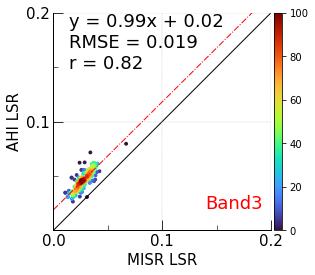

(0.9916382028602635, 0.8171639170307321, 0.01940267518730718)

In [113]:
mapping_scatter(X_v, Y_v, figure_title='test', band_name='band3', axis_min=0.0, axis_max=0.2)